# [**Estimation Ledoit-Wolf vs OAS**](https://nbviewer.org/github/Franck-PepperLabs/pepper_dsia_skl_doc_fr/blob/main/docs/examples/2_6_covariance/plot_lw_vs_oas.ipynb)<br/>([_Ledoit-Wolf vs OAS estimation_](https://scikit-learn.org/stable/auto_examples/covariance/plot_lw_vs_oas.html))

La meilleure estimation habituelle de la covariance par maximum de vraisemblance peut être régularisée en utilisant un rétrécissement. Ledoit et Wolf ont proposé une formule proche pour calculer le paramètre de rétrécissement asymptotiquement optimal (minimisant un critère MSE), ce qui donne l'estimation de covariance Ledoit-Wolf.

Chen et al. ont proposé une amélioration du paramètre de rétrécissement Ledoit-Wolf, le coefficient OAS, dont la convergence est significativement meilleure en supposant que les données sont gaussiennes.

Cet exemple, inspiré de la publication de Chen [1], montre une comparaison de l'erreur quadratique moyenne estimée des méthodes LW et OAS, en utilisant des données distribuées selon une loi gaussienne.

[1] "Shrinkage Algorithms for MMSE Covariance Estimation" Chen et al., IEEE Trans. on Sign. Proc., Volume 58, Issue 10, October 2010.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import cholesky, toeplitz

from sklearn.covariance import OAS, LedoitWolf

np.random.seed(0)

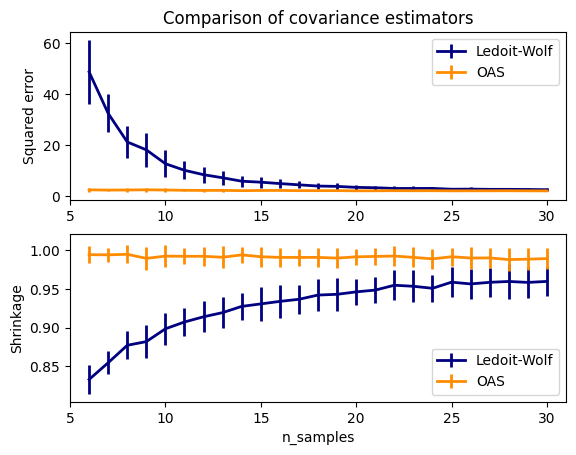

In [2]:
n_features = 100
# simulation covariance matrix (AR(1) process)
r = 0.1
real_cov = toeplitz(r ** np.arange(n_features))
coloring_matrix = cholesky(real_cov)

n_samples_range = np.arange(6, 31, 1)
repeat = 100
lw_mse = np.zeros((n_samples_range.size, repeat))
oa_mse = np.zeros((n_samples_range.size, repeat))
lw_shrinkage = np.zeros((n_samples_range.size, repeat))
oa_shrinkage = np.zeros((n_samples_range.size, repeat))
for i, n_samples in enumerate(n_samples_range):
    for j in range(repeat):
        X = np.dot(np.random.normal(size=(n_samples, n_features)), coloring_matrix.T)

        lw = LedoitWolf(store_precision=False, assume_centered=True)
        lw.fit(X)
        lw_mse[i, j] = lw.error_norm(real_cov, scaling=False)
        lw_shrinkage[i, j] = lw.shrinkage_

        oa = OAS(store_precision=False, assume_centered=True)
        oa.fit(X)
        oa_mse[i, j] = oa.error_norm(real_cov, scaling=False)
        oa_shrinkage[i, j] = oa.shrinkage_

# plot MSE
plt.subplot(2, 1, 1)
plt.errorbar(
    n_samples_range,
    lw_mse.mean(1),
    yerr=lw_mse.std(1),
    label="Ledoit-Wolf",
    color="navy",
    lw=2,
)
plt.errorbar(
    n_samples_range,
    oa_mse.mean(1),
    yerr=oa_mse.std(1),
    label="OAS",
    color="darkorange",
    lw=2,
)
plt.ylabel("Squared error")
plt.legend(loc="upper right")
plt.title("Comparison of covariance estimators")
plt.xlim(5, 31)

# plot shrinkage coefficient
plt.subplot(2, 1, 2)
plt.errorbar(
    n_samples_range,
    lw_shrinkage.mean(1),
    yerr=lw_shrinkage.std(1),
    label="Ledoit-Wolf",
    color="navy",
    lw=2,
)
plt.errorbar(
    n_samples_range,
    oa_shrinkage.mean(1),
    yerr=oa_shrinkage.std(1),
    label="OAS",
    color="darkorange",
    lw=2,
)
plt.xlabel("n_samples")
plt.ylabel("Shrinkage")
plt.legend(loc="lower right")
plt.ylim(plt.ylim()[0], 1.0 + (plt.ylim()[1] - plt.ylim()[0]) / 10.0)
plt.xlim(5, 31)

plt.show()